In [2]:
import dask.array as da
import xarray as xr
import numpy as np
import scipy

In [3]:
scipy.__file__

'/home/vdtol/.local/lib/python3.10/site-packages/scipy/__init__.py'

In [4]:
ds = xr.tutorial.open_dataset('air_temperature',
                              chunks={'lat': 25, 'lon': 25, 'time': 10})

In [7]:
xr.open_dataset?

Signature:
xr.open_dataset(
    filename_or_obj: 'str | os.PathLike[Any] | BufferedIOBase | AbstractDataStore',
    *,
    engine: 'T_Engine' = None,
    chunks: 'T_Chunks' = None,
    cache: 'bool | None' = None,
    decode_cf: 'bool | None' = None,
    mask_and_scale: 'bool | None' = None,
    decode_times: 'bool | None' = None,
    decode_timedelta: 'bool | None' = None,
    use_cftime: 'bool | None' = None,
    concat_characters: 'bool | None' = None,
    decode_coords: "Literal['coordinates', 'all'] | bool | None" = None,
    drop_variables: 'str | Iterable[str] | None' = None,
    inline_array: 'bool' = False,
    backend_kwargs: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Dataset'
Docstring:
Open and decode a dataset from a file or file-like object.

Parameters
----------
filename_or_obj : str, Path, file-like or DataStore
    Strings and Path objects are interpreted as a path to a netCDF file
    or an OpenDAP URL and opened with python-netCDF4, unless the filename
    

In [30]:
def f(chunk):
    print(chunk.air.data.__class__)
    return chunk
    
x = xr.map_blocks(
        f, ds)

<class 'numpy.ndarray'>


In [31]:
x.compute()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [2]:
def read_block(block_info=None, block_id=None):
    shape = block_info[None]['chunk-shape']
    print(f"reading block {block_id} of shape {shape}")
    v = block_id[0]*10 + block_id[1]
    r = (v*np.ones(shape)).astype(np.int64)
    return r

def process1_block(a, block_info=None, block_id=None):
    shape = a.shape
    print(f"processing1 block {block_id} of shape {shape}")
    v = block_id[0]*10 + block_id[1]
    r = (v*100+a).astype(np.int64)
    return r

def process2_block(a, block_info=None, block_id=None):
    shape = a.shape
    print(f"processing2 block {block_id} of shape {shape}")
    v = block_id[0]*10 + block_id[1]
    return v*10000 + a

x1 = da.map_blocks(
    read_block,
    dtype=np.float64,
    chunks=((3,)*2 ,  (1,)*3), meta=np.array((), dtype=np.int64))

x2 = da.map_blocks(
    process1_block,
    x1,
    meta=np.array((), dtype=np.int64))

x3 = da.rechunk(x2, chunks = ((1,)*6, 3))

x4 = da.map_blocks(
    process2_block,
    x3,
    meta=np.array((), dtype=np.int64))


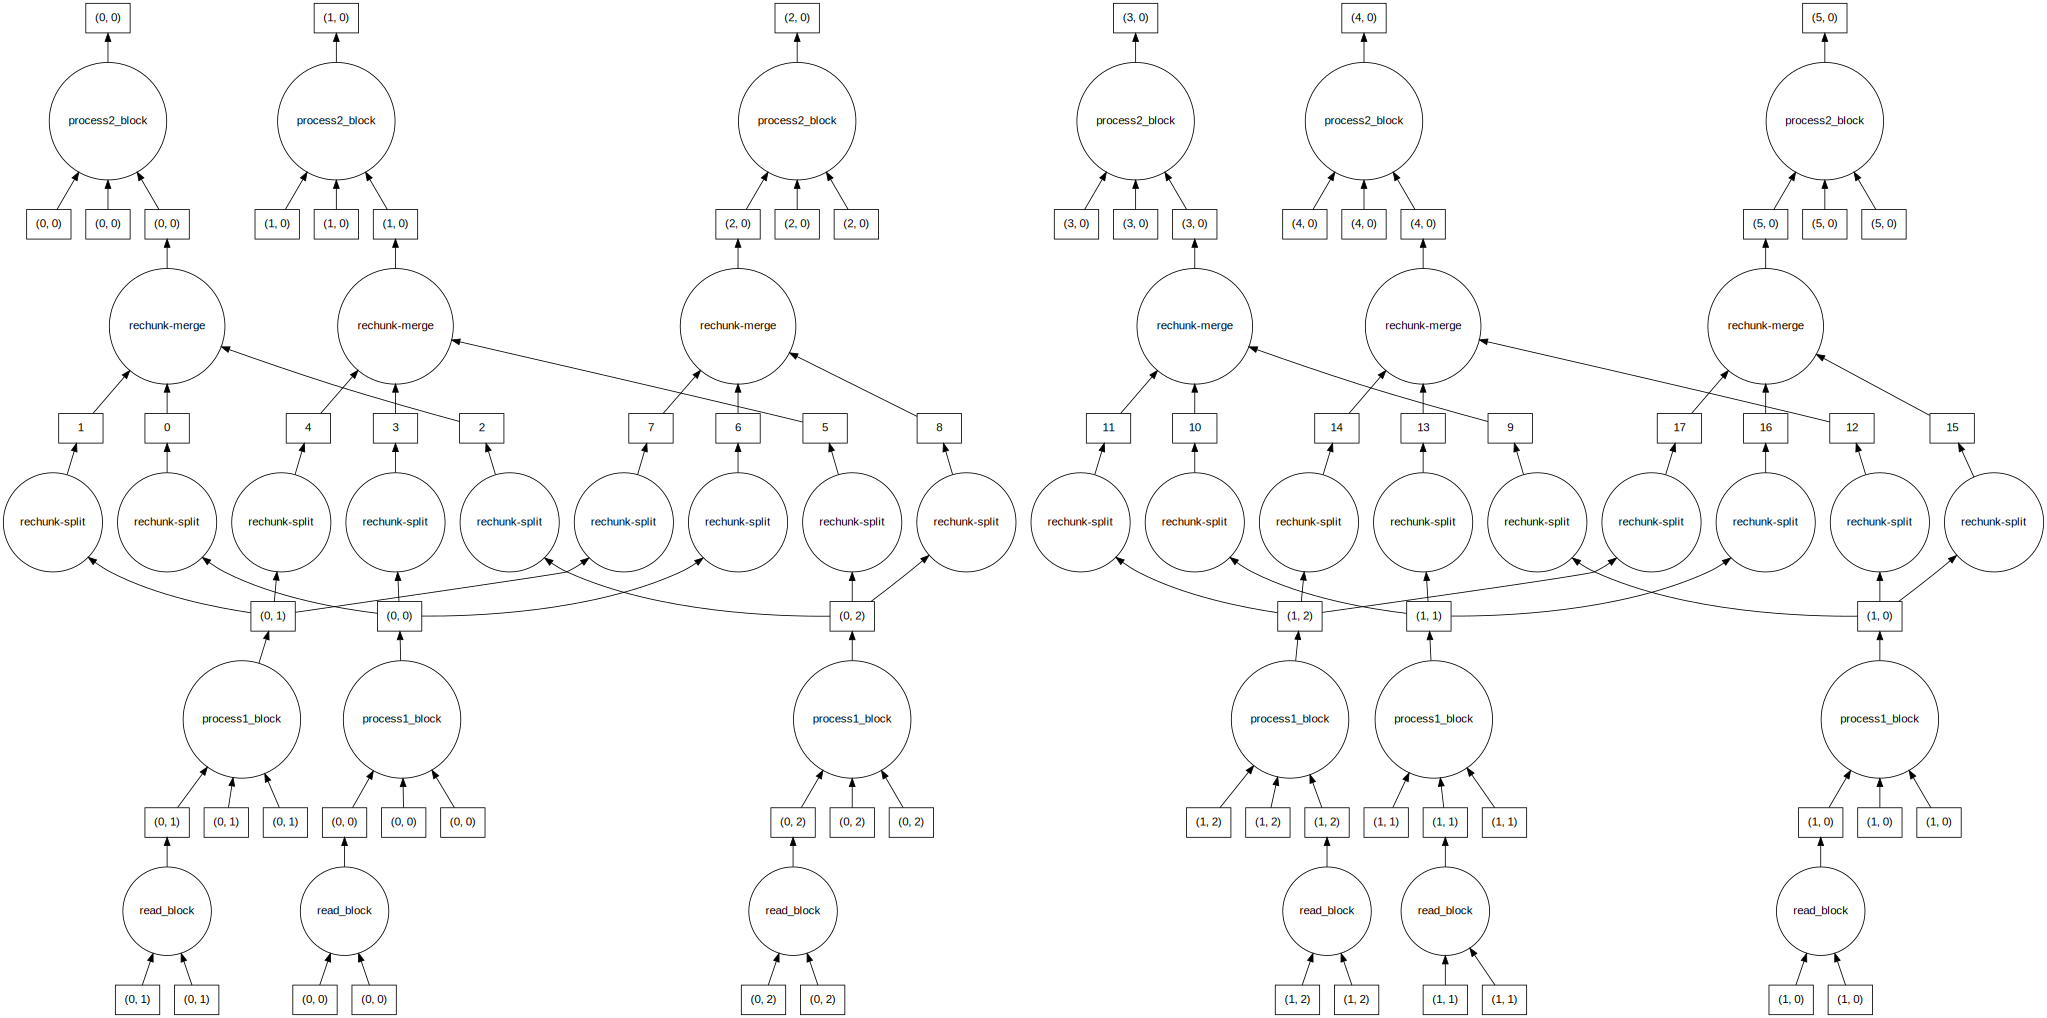

In [3]:
x4.visualize('graph.svg')

In [4]:
v = x4.compute()

reading block (0, 0) of shape (3, 1)
processing1 block (0, 0) of shape (3, 1)
reading block (0, 1) of shape (3, 1)
processing1 block (0, 1) of shape (3, 1)
reading block (0, 2) of shape (3, 1)
processing1 block (0, 2) of shape (3, 1)
reading block (1, 0) of shape (3, 1)
processing1 block (1, 0) of shape (3, 1)
processing2 block (0, 0) of shape (1, 3)
reading block (1, 1) of shape (3, 1)
processing1 block (1, 1) of shape (3, 1)
reading block (1, 2) of shape (3, 1)
processing1 block (1, 2) of shape (3, 1)
processing2 block (1, 0) of shape (1, 3)
processing2 block (2, 0) of shape (1, 3)
processing2 block (3, 0) of shape (1, 3)
processing2 block (4, 0) of shape (1, 3)
processing2 block (5, 0) of shape (1, 3)


In [5]:
v

array([[     0,    101,    202],
       [100000, 100101, 100202],
       [200000, 200101, 200202],
       [301010, 301111, 301212],
       [401010, 401111, 401212],
       [501010, 501111, 501212]])

In [6]:
x1.dtype

dtype('float64')